Felix Douven, Yosha op het Veld, Kasper Walraven

# Initialization

load all needed libraries and functions, 
check the previous tutorial how to correctly load keras and other modules

In [17]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D

import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from tqdm import tqdm


importing the libraries used in the code.

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

> Just remember that you must use at least 3 classes and at most 10 classes, so, in the case of the cifar10, if you decide to use 5 classes, then get rid of the other 5 to save space. In other words, choose a dataset, check the images (amount, size in pixels) and implement the steps needed shown in the provided notebook. 

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


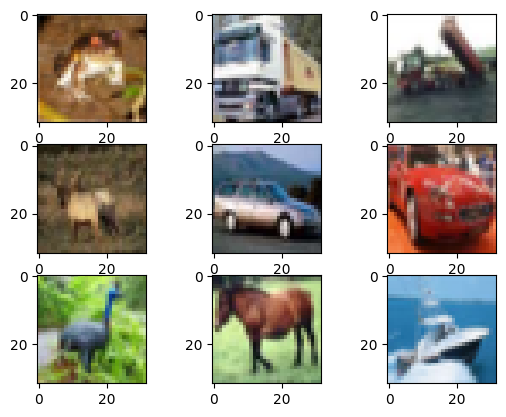

In [18]:
from matplotlib import pyplot
from keras.datasets import cifar10

(trainX, trainY), (testX, testY) = cifar10.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
catagories = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i])

pyplot.show()

importing the images and plotting a few samples.

# Prepare Pixel Data

pre-process your raw input data... rescale... normalize....

x =  [[[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[113 120 112]
  [111 118 111]
  [105 112 106]
  ...
  [ 72  81  80]
  [ 72  80  79]
  [ 72  80  79]]

 [[111 118 110]
  [104 111 104]
  [ 99 106  98]
  ...
  [ 68  75  73]
  [ 70  76  75]
  [ 78  84  82]]

 [[106 113 105]
  [ 99 106  98]
  [ 95 102  94]
  ...
  [ 78  85  83]
  [ 79  85  83]
  [ 80  86  84]]]


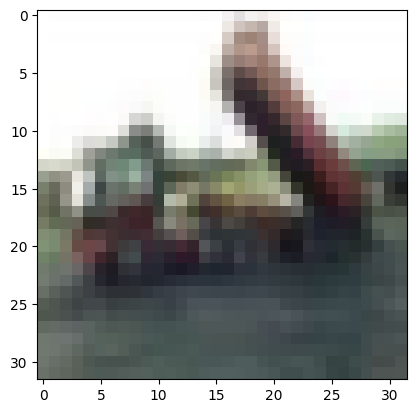

na norm [[[0.24103695 0.23701033 0.2449874 ]
  [0.2431178  0.23965265 0.24643646]
  [0.24044508 0.23909946 0.24423422]
  ...
  [0.28057057 0.27200606 0.27913165]
  [0.28430322 0.27541536 0.28258422]
  [0.28472024 0.2759236  0.28289214]]

 [[0.24103695 0.23701033 0.2449874 ]
  [0.24503967 0.24154714 0.24838458]
  [0.24234582 0.24098957 0.24616493]
  ...
  [0.28278852 0.2741563  0.2813382 ]
  [0.28655067 0.27759254 0.28481808]
  [0.286971   0.27810484 0.28512844]]

 [[0.24103695 0.23701033 0.2449874 ]
  [0.24407873 0.24059989 0.24741052]
  [0.24139546 0.2400445  0.24519958]
  ...
  [0.28167954 0.27308118 0.28023493]
  [0.28542694 0.27650395 0.28370115]
  [0.2858456  0.27701423 0.2840103 ]]

 ...

 [[0.10681245 0.11153428 0.10760231]
  [0.10666433 0.11177475 0.10812034]
  [0.09978946 0.1058464  0.10232738]
  ...
  [0.07984617 0.08708494 0.08826297]
  [0.08090843 0.08708786 0.08823776]
  [0.08102711 0.08724858 0.0883339 ]]

 [[0.10492197 0.10967537 0.10568084]
  [0.09993774 0.10514405 0.10

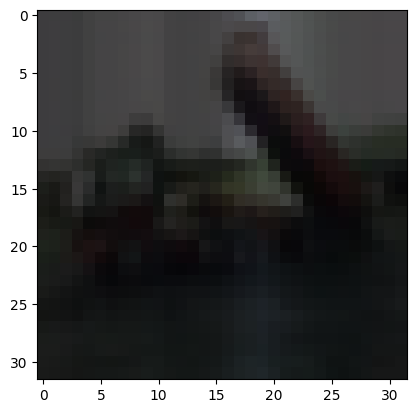

In [19]:
t = 0
from sklearn.utils import shuffle



print("x = ", trainX[2])
plt.imshow(trainX[2], cmap=plt.cm.binary)
plt.show()
 
trainX = trainX.astype('float32')
testX = testX.astype('float32')  
X_train = tf.keras.utils.normalize(trainX, axis=1) 
X_test = tf.keras.utils.normalize(testX, axis=1) 

print("na norm", X_train[2])
print("dit is een", catagories[int(trainY[2])])
plt.imshow(X_train[2], cmap=plt.cm.binary)
plt.show()

X_train, trainY = shuffle(X_train, trainY, random_state=0)

the pixel data and a plot of the pictures is shown. all values scaled between 0 and 1. thus the highest value is scaled down to 1. This is why the second image is a different color than before

## Define your Model

This is the crucial part of the assignment! 

We do not expect that you can/should develop your own network model, so you can take the suggested model as decribed on [the given website](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).....but 


**NOTE:**

If you run into memory and processing limitations you can reduce the amount of convolutions and dense layers, you can reduce the amount of classes, you can reduce the amount of input images, or the input images size. With a scaled down network the accuracy will be lower then with a more complex network. 


* How is your model constructed, how many trainable parameters does it have, and where are they located?

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

the model has 11 layers, 9 of which are hidden. the input layer has a shape of 32*32*3. the output has 10 neurons, 1 for each class. the hidden layers consist of 3 convolution layers, each of them followed by a pooling layer. the output of these layers are run trough 2 fully connected layers of 128 neurons each.

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. 

* Which batch size and how many epochs give a good result?

In [5]:
model.compile(optimizer='SGD',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track
#model.fit(X_train, trainY, epochs=10, batch_size=64, validation_data=(X_test, testY), verbose=0)
history = model.fit(X_train, trainY, epochs=100)  # train the model

Epoch 1/100
1563/1563 [==============================] - 15s 6ms/step - loss: 2.3005 - accuracy: 0.1247
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2799 - accuracy: 0.1788
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1250 - accuracy: 0.2199
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9381 - accuracy: 0.2977
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7964 - accuracy: 0.3506
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7068 - accuracy: 0.3840
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6286 - accuracy: 0.4163
Epoch 8/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5626 - accuracy: 0.4420
Epoch 9/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5037 - accuracy: 0.4618
Epoch 10/100
1563/1563 [==============================] - 12s 8ms/step -

Here the optimiser is chosen and model is trained with 100 iterations.

# Evaluate Model

Show the model accuracy after the training process ... 
* How accurate is your final model?

In [6]:
val_loss, val_acc = model.evaluate(X_test, testY)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 4ms/step - loss: 2.4992 - accuracy: 0.6490
2.4991886615753174
0.6489999890327454


Here the model is tested with the given test data. The accuracy is shown

# learning curves

Show the learning curves of your training sequence, of accuracy, value_accuracy and loss, value_loss

* Explain what the difference is between the therms accuracy and value_accuracy? (what do they represent)

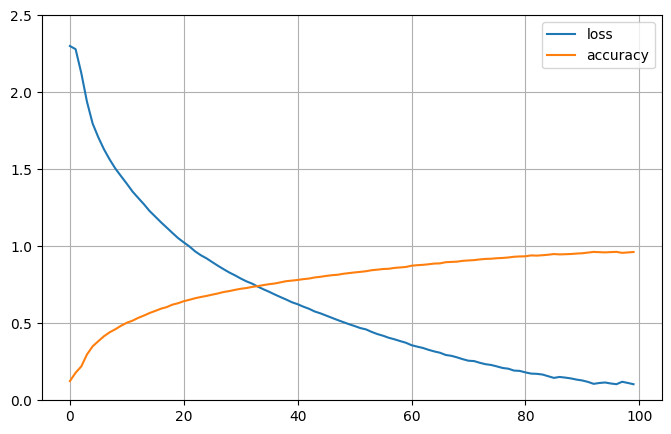

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()


the loss and accurcy during training is plotted. the graph flattens off at the end near 96%

# Save model

Save the model for later usage

In [8]:
model.save('Ass2B')
new_model = tf.keras.models.load_model('Ass2B')

INFO:tensorflow:Assets written to: Ass2B\assets


INFO:tensorflow:Assets written to: Ass2B\assets


# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

313/313 [==============================] - 1s 3ms/step


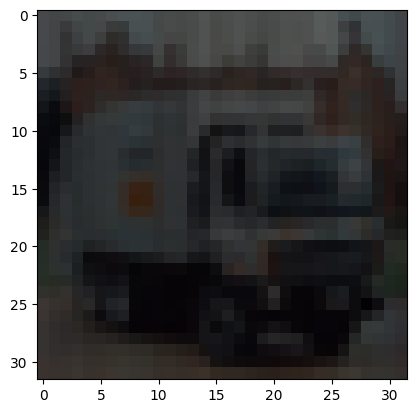

prediction = truck


In [9]:
predictions = new_model.predict([X_test])

plt.imshow(X_test[11], cmap=plt.cm.binary)
plt.show()

print("prediction =", catagories[np.argmax(predictions[11])])


Here we predict one image to double check the model. this image is out of the test data. The model classifies the image as truck. as seen by the image this is correct.

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

100%|██████████| 10/10 [00:00<00:00, 626.71it/s]


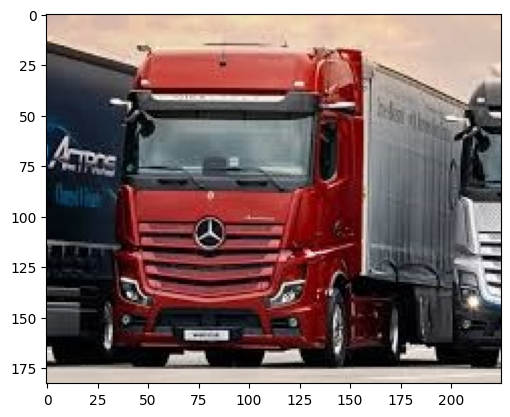

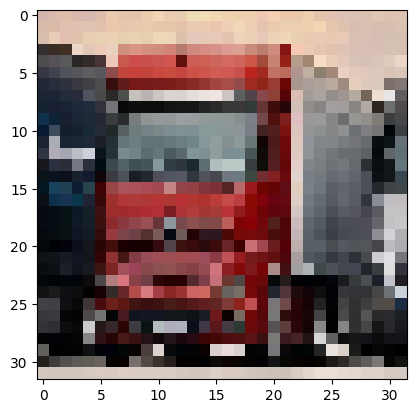

In [11]:
#yosha
#DATADIR = "C:/Users/yosha19/OneDrive - Office 365 Fontys/General/Ass2B/plaatjes"

#kasper
DATADIR = "C:/Users/mobie/OneDrive - Office 365 Fontys/General - AIS/Ass2B/plaatjes"

test_data = []

def create_test_data():
    for category in catagories: 

        path = os.path.join(DATADIR,category)  
        class_num = catagories.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            
                
                new_array = cv2.resize(img_array, (32, 32)) 
                test_data.append([new_array, class_num]) 
                
            except Exception as e:  
                pass
                    
            
    plt.imshow(img_array) 
    plt.show()      

    plt.imshow(new_array)
    plt.show()  

create_test_data()




Here we import our own data set. An for loop iterates trough all images and resizes them and adds them to an array. The before and after pictures of the resize are shown.

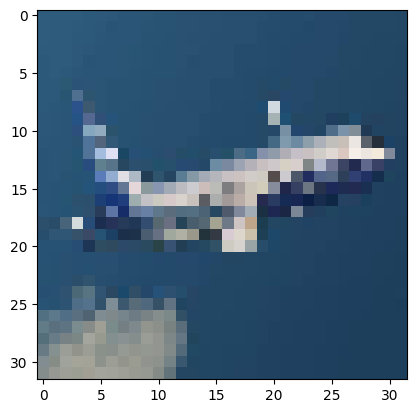

x =  [[[ 47  92 125]
  [ 46  91 124]
  [ 46  91 124]
  ...
  [ 35  72 101]
  [ 35  72 101]
  [ 34  71 100]]

 [[ 47  92 125]
  [ 46  91 124]
  [ 46  91 124]
  ...
  [ 35  72 101]
  [ 35  72 101]
  [ 34  71 100]]

 [[ 47  92 125]
  [ 46  91 124]
  [ 46  91 124]
  ...
  [ 34  71 100]
  [ 34  71 100]
  [ 34  71 100]]

 ...

 [[104 122 131]
  [133 145 144]
  [155 158 151]
  ...
  [ 29  63  91]
  [ 29  63  91]
  [ 29  63  91]]

 [[130 141 145]
  [134 140 134]
  [159 163 155]
  ...
  [ 29  63  91]
  [ 29  63  91]
  [ 29  63  91]]

 [[132 141 140]
  [150 152 147]
  [158 159 151]
  ...
  [ 29  63  91]
  [ 29  63  91]
  [ 29  63  91]]]


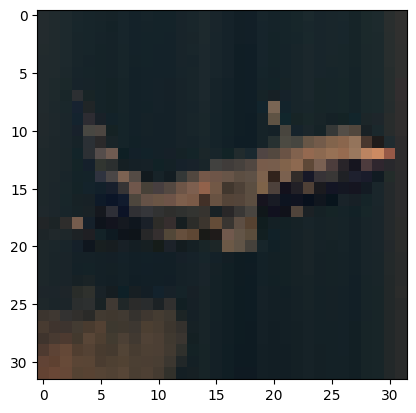

na norm [[[0.13840901 0.17216424 0.18154668]
  [0.12656673 0.16713743 0.17910325]
  [0.11706388 0.16291718 0.17844239]
  ...
  [0.11534082 0.16677036 0.17759987]
  [0.16175473 0.18305742 0.18260134]
  [0.19150144 0.19144074 0.18632282]]

 [[0.13840901 0.17216424 0.18154668]
  [0.12656673 0.16713743 0.17910325]
  [0.11706388 0.16291718 0.17844239]
  ...
  [0.11534082 0.16677036 0.17759987]
  [0.16175473 0.18305742 0.18260134]
  [0.19150144 0.19144074 0.18632282]]

 [[0.13840901 0.17216424 0.18154668]
  [0.12656673 0.16713743 0.17910325]
  [0.11706388 0.16291718 0.17844239]
  ...
  [0.11204537 0.1644541  0.17584145]
  [0.15713316 0.18051496 0.1807934 ]
  [0.19150144 0.19144074 0.18632282]]

 ...

 [[0.30626675 0.22830475 0.19026092]
  [0.36594295 0.26631788 0.20799087]
  [0.39445439 0.28286719 0.21729678]
  ...
  [0.09556811 0.14592406 0.16001572]
  [0.13402534 0.16017524 0.164522  ]
  [0.16333946 0.16986995 0.16955377]]

 [[0.38283344 0.26386041 0.21059415]
  [0.3686944  0.25713451 0.19

In [15]:
X = []
Y = []
y = []
x_test = []

for features,label in test_data:
    X.append(features)
    Y.append(label)
            
plt.imshow(X[0], cmap=plt.cm.binary)
plt.show()
print("x = ", X[0])
    
X = tf.keras.utils.normalize(X, axis=1) 


plt.imshow(X[0], cmap=plt.cm.binary)
plt.show()
print("na norm", X[0])

Here we split the data into two lists; the pictures and the catagories. After that the images are normalized this means all the  values are made between zero and one and the before and after is shown. 

(32, 32, 3)


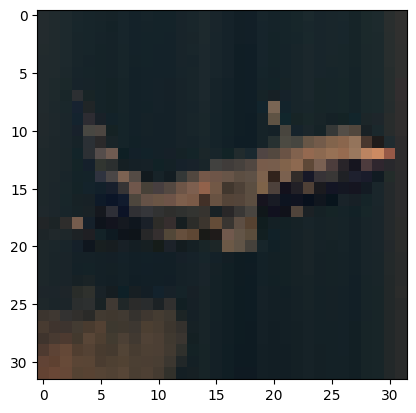

1/1 [==============================] - 0s 236ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


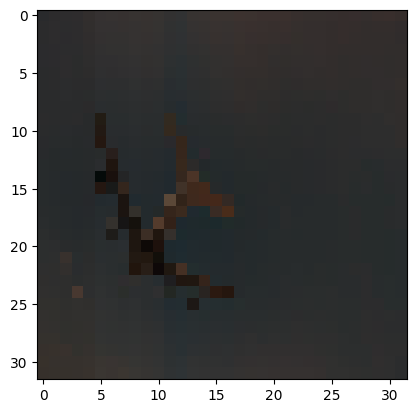

1/1 [==============================] - 0s 24ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


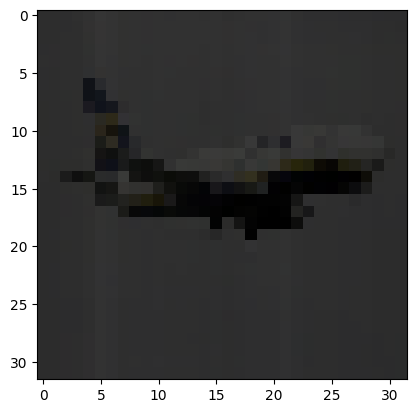

1/1 [==============================] - 0s 29ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


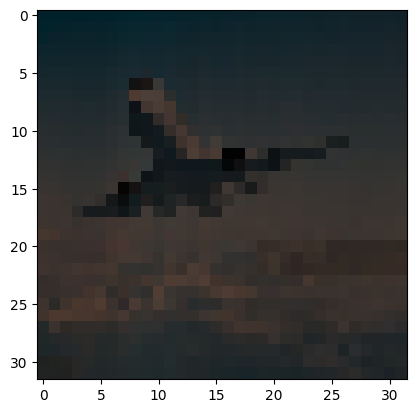

1/1 [==============================] - 0s 25ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


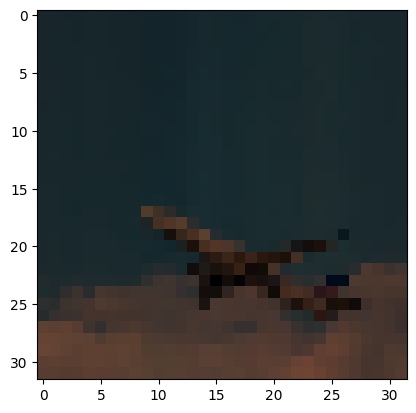

1/1 [==============================] - 0s 27ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


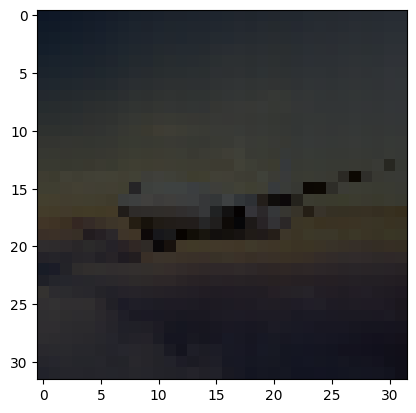

1/1 [==============================] - 0s 23ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


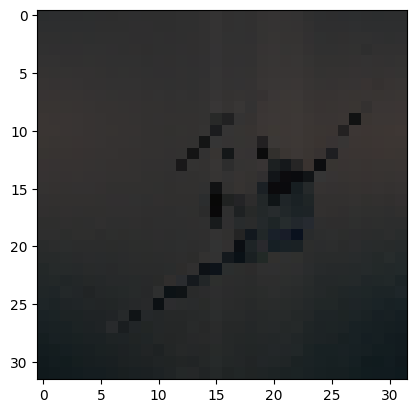

1/1 [==============================] - 0s 25ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


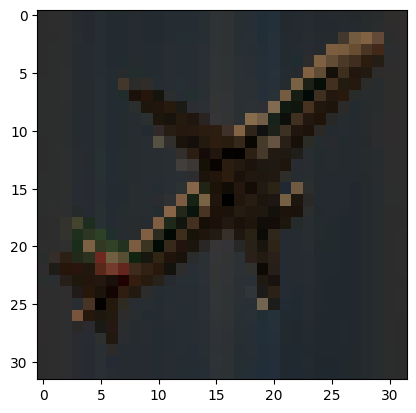

1/1 [==============================] - 0s 24ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


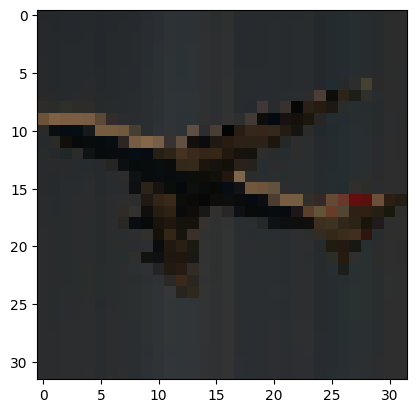

1/1 [==============================] - 0s 33ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


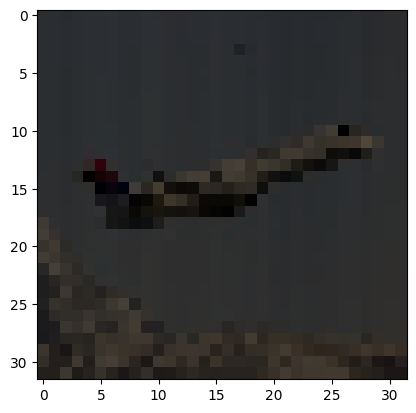

1/1 [==============================] - 0s 22ms/step
picture shows:     airplane
model prediction:  airplane
correct
(32, 32, 3)


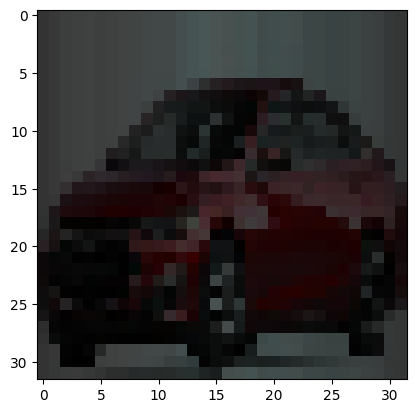

1/1 [==============================] - 0s 22ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


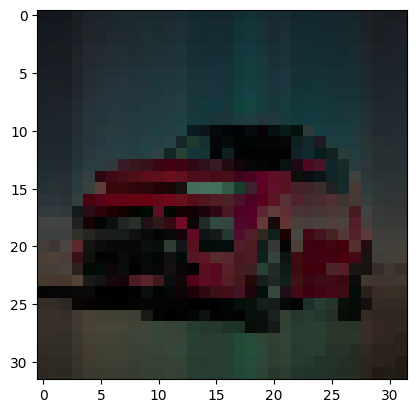

1/1 [==============================] - 0s 24ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


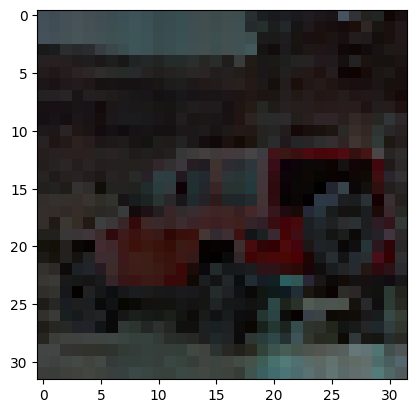

1/1 [==============================] - 0s 23ms/step
picture shows:     automobile
model prediction:  truck
wrong
(32, 32, 3)


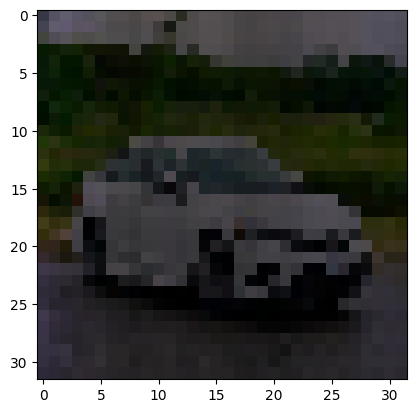

1/1 [==============================] - 0s 22ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


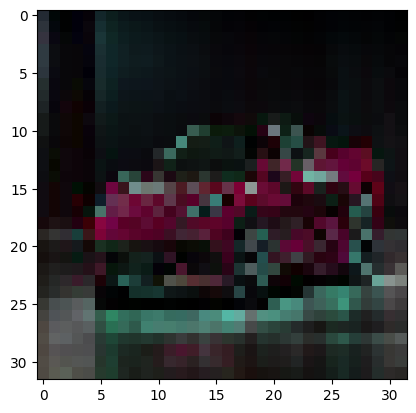

1/1 [==============================] - 0s 59ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


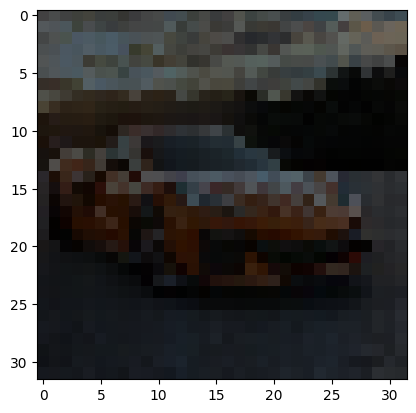

1/1 [==============================] - 0s 24ms/step
picture shows:     automobile
model prediction:  truck
wrong
(32, 32, 3)


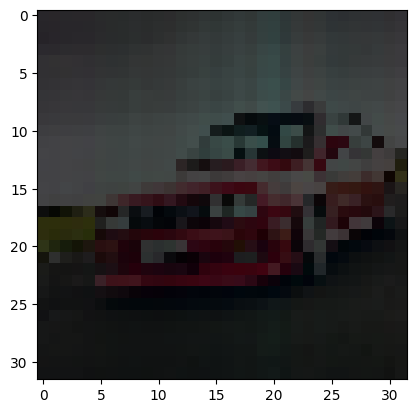

1/1 [==============================] - 0s 23ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


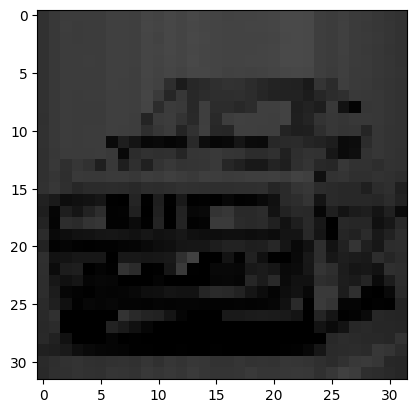

1/1 [==============================] - 0s 23ms/step
picture shows:     automobile
model prediction:  truck
wrong
(32, 32, 3)


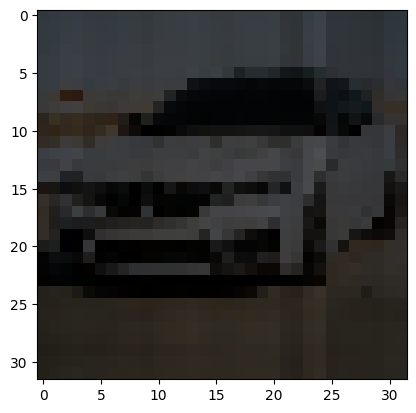

1/1 [==============================] - 0s 24ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


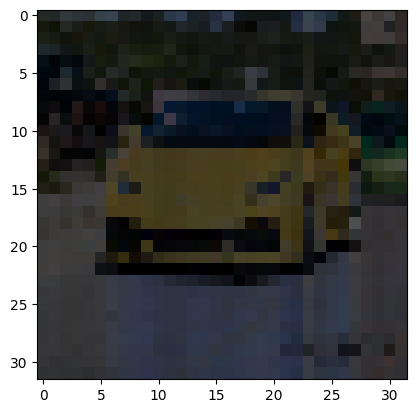

1/1 [==============================] - 0s 28ms/step
picture shows:     automobile
model prediction:  automobile
correct
(32, 32, 3)


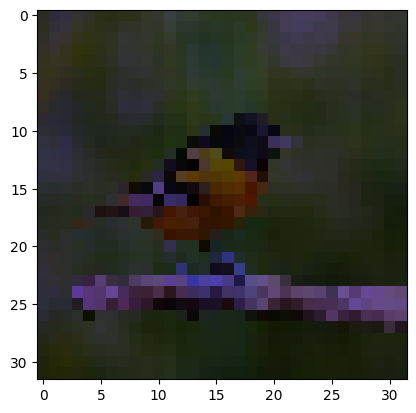

1/1 [==============================] - 0s 23ms/step
picture shows:     bird
model prediction:  bird
correct
(32, 32, 3)


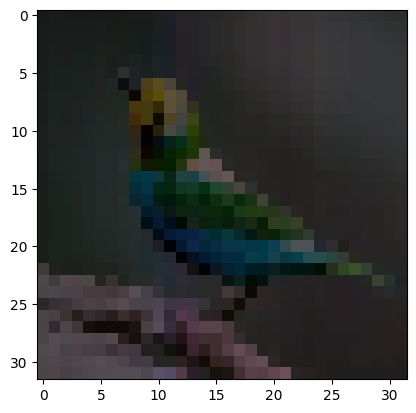

1/1 [==============================] - 0s 22ms/step
picture shows:     bird
model prediction:  bird
correct
(32, 32, 3)


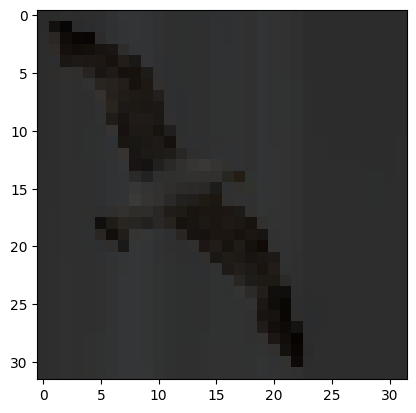

1/1 [==============================] - 0s 27ms/step
picture shows:     bird
model prediction:  airplane
wrong
(32, 32, 3)


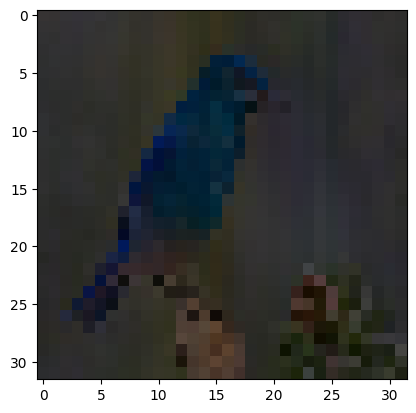

1/1 [==============================] - 0s 26ms/step
picture shows:     bird
model prediction:  bird
correct
(32, 32, 3)


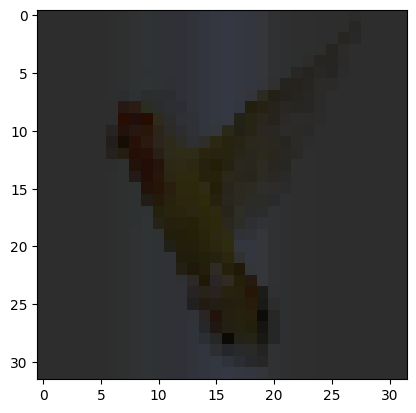

1/1 [==============================] - 0s 26ms/step
picture shows:     bird
model prediction:  bird
correct
(32, 32, 3)


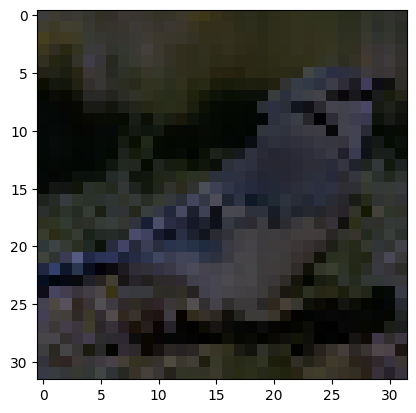

1/1 [==============================] - 0s 25ms/step
picture shows:     bird
model prediction:  automobile
wrong
(32, 32, 3)


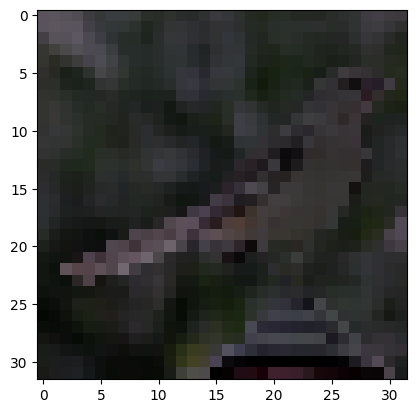

1/1 [==============================] - 0s 24ms/step
picture shows:     bird
model prediction:  bird
correct
(32, 32, 3)


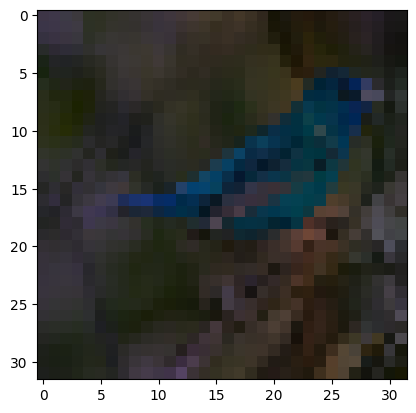

1/1 [==============================] - 0s 23ms/step
picture shows:     bird
model prediction:  airplane
wrong
(32, 32, 3)


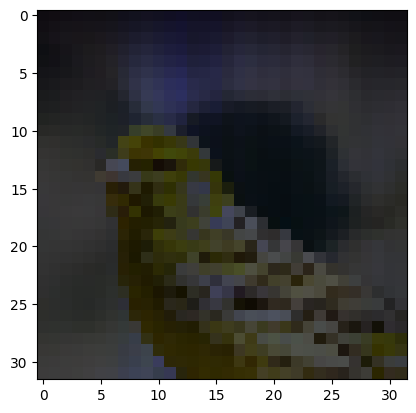

1/1 [==============================] - 0s 30ms/step
picture shows:     bird
model prediction:  frog
wrong
(32, 32, 3)


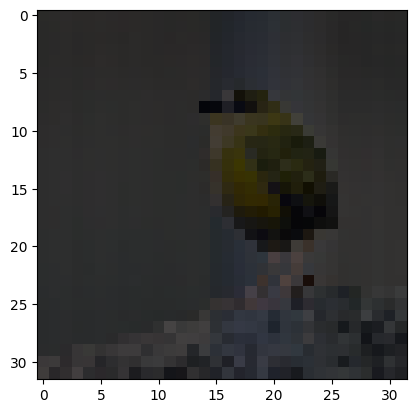

1/1 [==============================] - 0s 26ms/step
picture shows:     bird
model prediction:  bird
correct
(32, 32, 3)


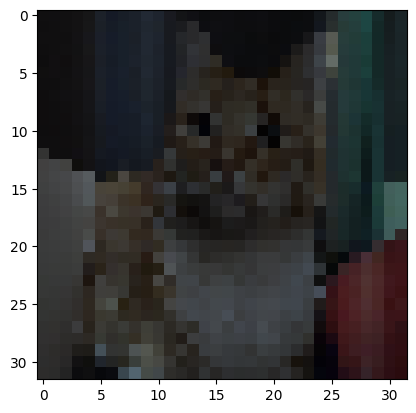

1/1 [==============================] - 0s 24ms/step
picture shows:     cat
model prediction:  dog
wrong
(32, 32, 3)


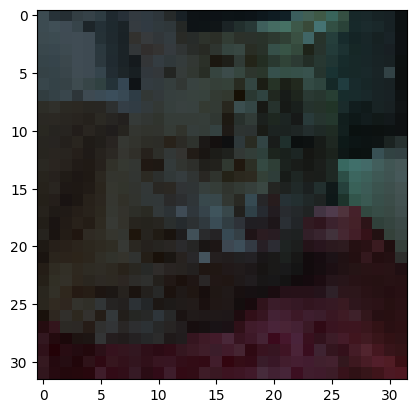

1/1 [==============================] - 0s 25ms/step
picture shows:     cat
model prediction:  truck
wrong
(32, 32, 3)


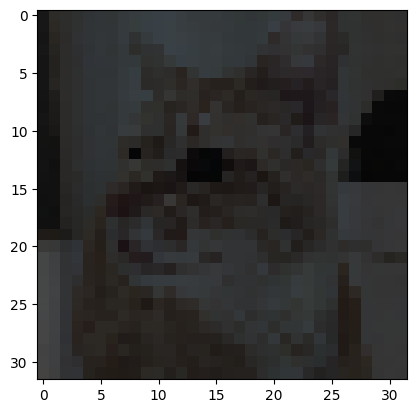

1/1 [==============================] - 0s 26ms/step
picture shows:     cat
model prediction:  cat
correct
(32, 32, 3)


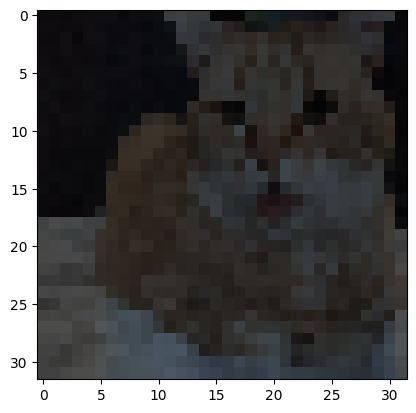

1/1 [==============================] - 0s 26ms/step
picture shows:     cat
model prediction:  dog
wrong
(32, 32, 3)


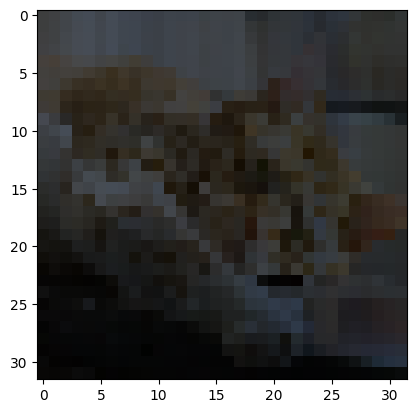

1/1 [==============================] - 0s 26ms/step
picture shows:     cat
model prediction:  frog
wrong
(32, 32, 3)


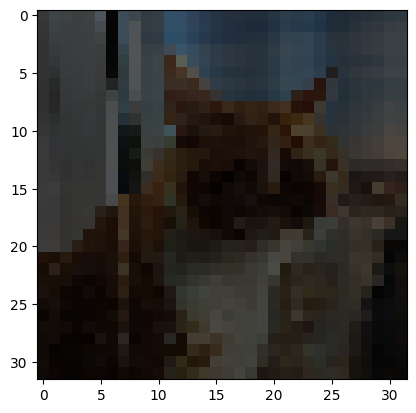

1/1 [==============================] - 0s 24ms/step
picture shows:     cat
model prediction:  cat
correct
(32, 32, 3)


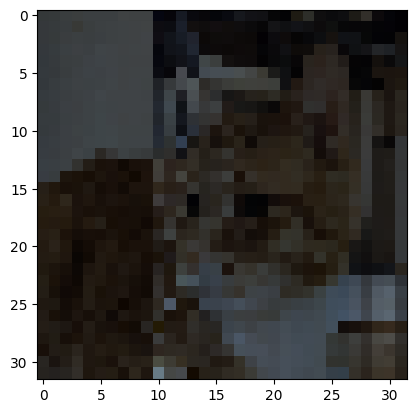

1/1 [==============================] - 0s 21ms/step
picture shows:     cat
model prediction:  cat
correct
(32, 32, 3)


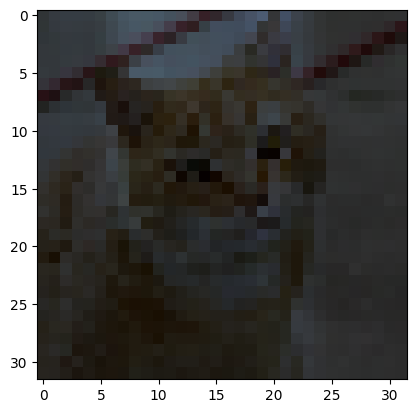

1/1 [==============================] - 0s 23ms/step
picture shows:     cat
model prediction:  deer
wrong
(32, 32, 3)


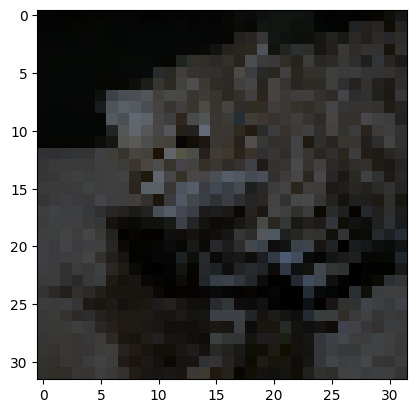

1/1 [==============================] - 0s 26ms/step
picture shows:     cat
model prediction:  frog
wrong
(32, 32, 3)


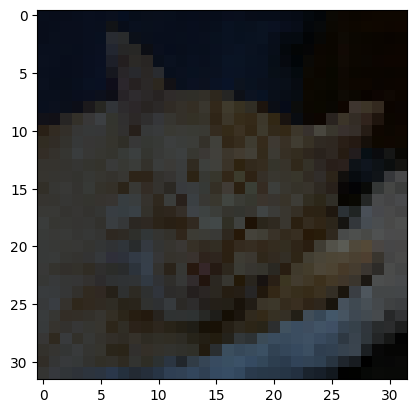

1/1 [==============================] - 0s 23ms/step
picture shows:     cat
model prediction:  frog
wrong
(32, 32, 3)


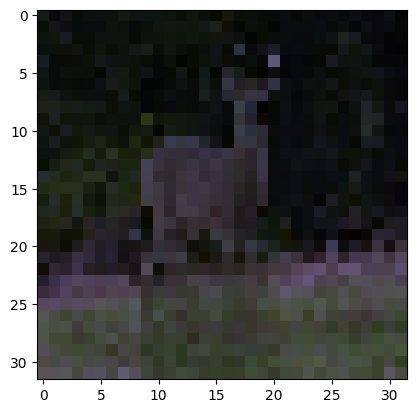

1/1 [==============================] - 0s 25ms/step
picture shows:     deer
model prediction:  bird
wrong
(32, 32, 3)


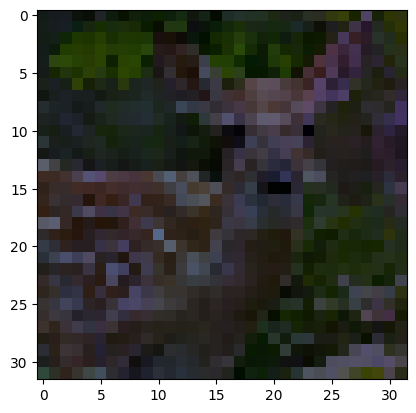

1/1 [==============================] - 0s 27ms/step
picture shows:     deer
model prediction:  horse
wrong
(32, 32, 3)


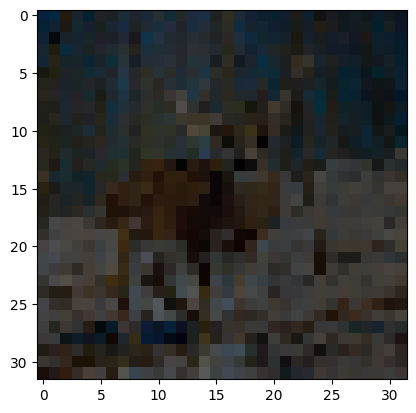

1/1 [==============================] - 0s 24ms/step
picture shows:     deer
model prediction:  frog
wrong
(32, 32, 3)


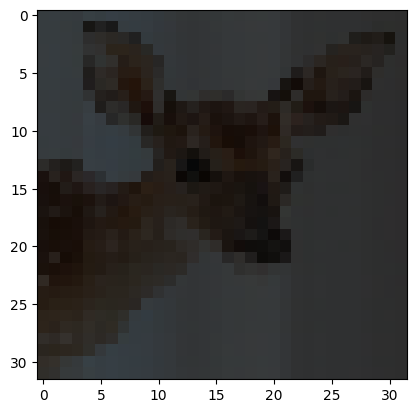

1/1 [==============================] - 0s 24ms/step
picture shows:     deer
model prediction:  airplane
wrong
(32, 32, 3)


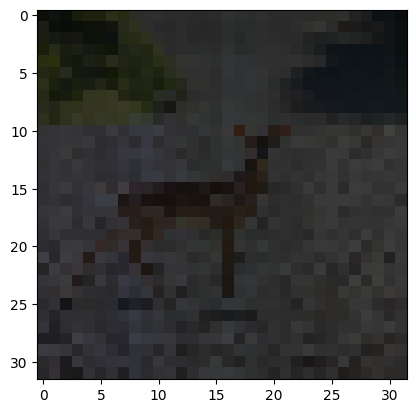

1/1 [==============================] - 0s 22ms/step
picture shows:     deer
model prediction:  deer
correct
(32, 32, 3)


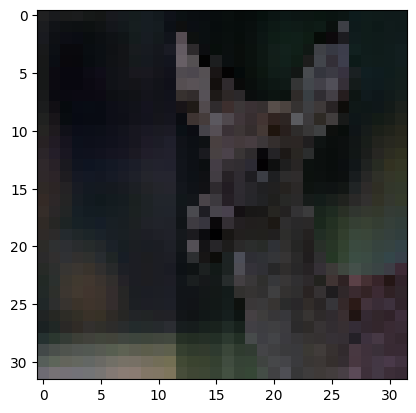

1/1 [==============================] - 0s 21ms/step
picture shows:     deer
model prediction:  dog
wrong
(32, 32, 3)


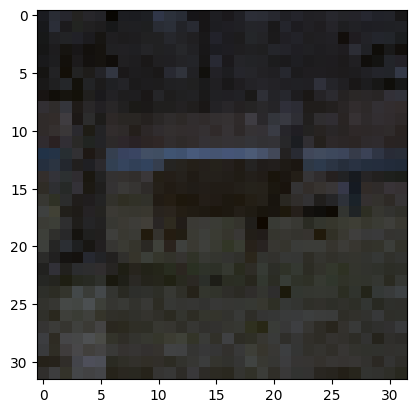

1/1 [==============================] - 0s 27ms/step
picture shows:     deer
model prediction:  ship
wrong
(32, 32, 3)


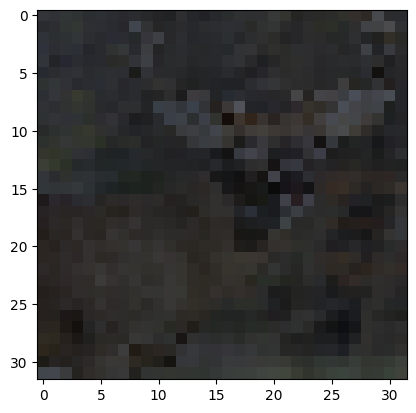

1/1 [==============================] - 0s 22ms/step
picture shows:     deer
model prediction:  deer
correct
(32, 32, 3)


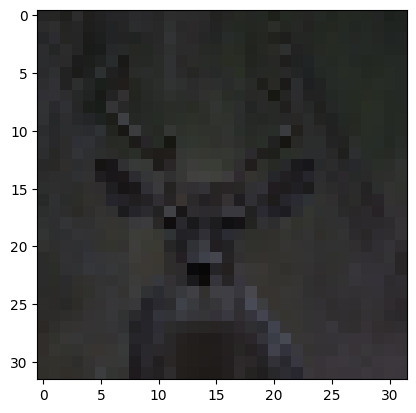

1/1 [==============================] - 0s 27ms/step
picture shows:     deer
model prediction:  deer
correct
(32, 32, 3)


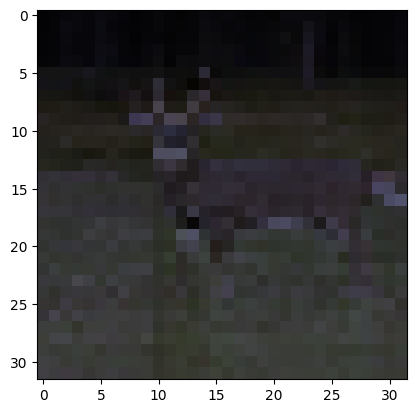

1/1 [==============================] - 0s 30ms/step
picture shows:     deer
model prediction:  deer
correct
(32, 32, 3)


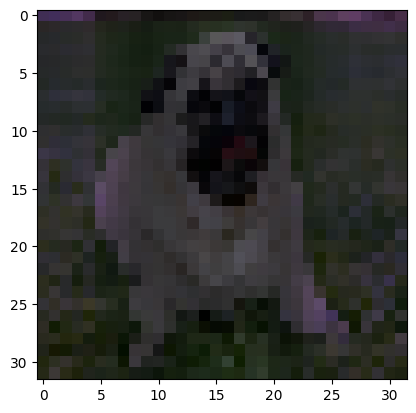

1/1 [==============================] - 0s 26ms/step
picture shows:     dog
model prediction:  dog
correct
(32, 32, 3)


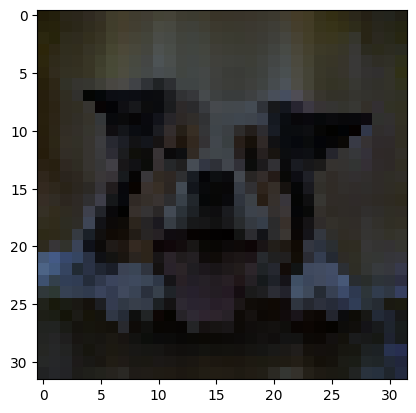

1/1 [==============================] - 0s 28ms/step
picture shows:     dog
model prediction:  dog
correct
(32, 32, 3)


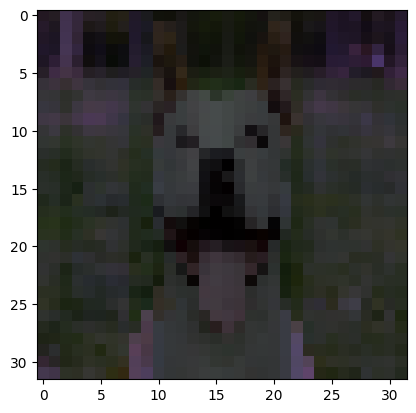

1/1 [==============================] - 0s 23ms/step
picture shows:     dog
model prediction:  bird
wrong
(32, 32, 3)


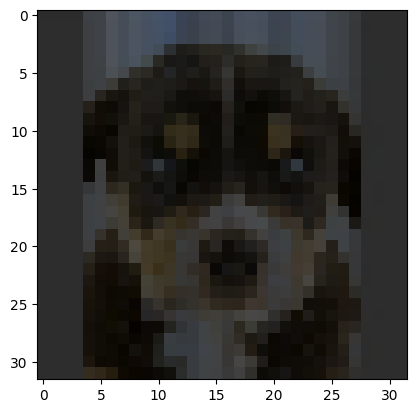

1/1 [==============================] - 0s 25ms/step
picture shows:     dog
model prediction:  dog
correct
(32, 32, 3)


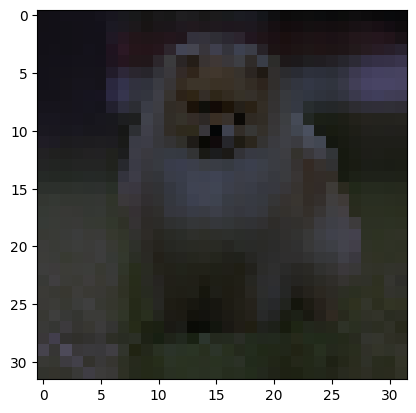

1/1 [==============================] - 0s 29ms/step
picture shows:     dog
model prediction:  dog
correct
(32, 32, 3)


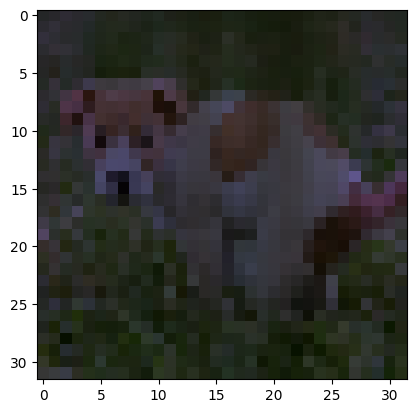

1/1 [==============================] - 0s 26ms/step
picture shows:     dog
model prediction:  frog
wrong
(32, 32, 3)


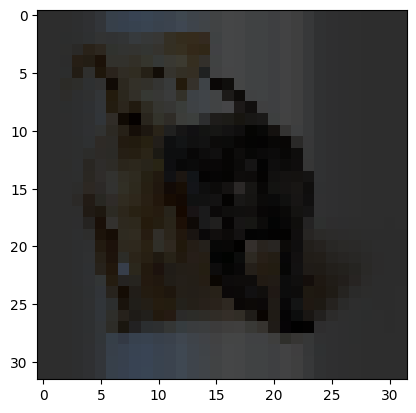

1/1 [==============================] - 0s 23ms/step
picture shows:     dog
model prediction:  cat
wrong
(32, 32, 3)


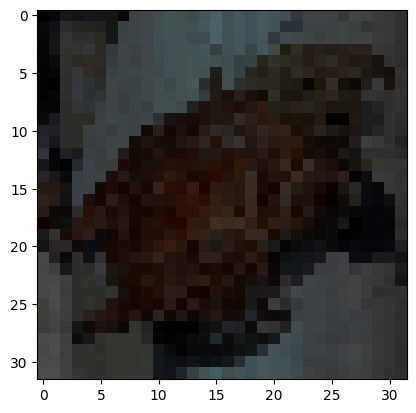

1/1 [==============================] - 0s 27ms/step
picture shows:     dog
model prediction:  truck
wrong
(32, 32, 3)


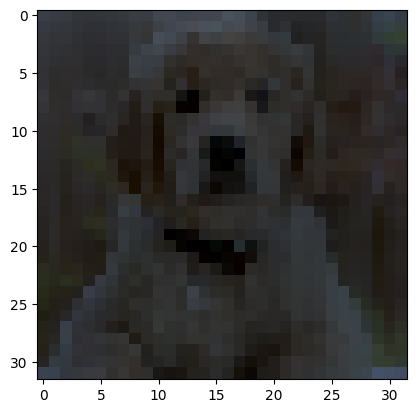

1/1 [==============================] - 0s 25ms/step
picture shows:     dog
model prediction:  dog
correct
(32, 32, 3)


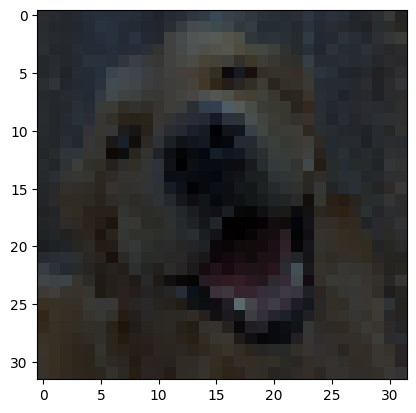

1/1 [==============================] - 0s 22ms/step
picture shows:     dog
model prediction:  cat
wrong
(32, 32, 3)


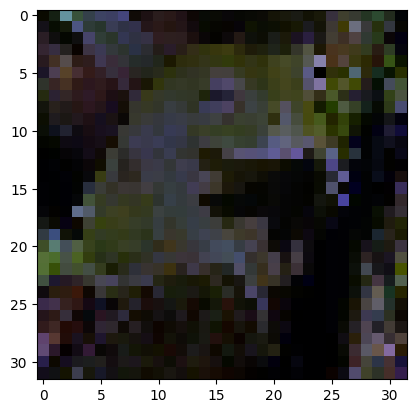

1/1 [==============================] - 0s 24ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


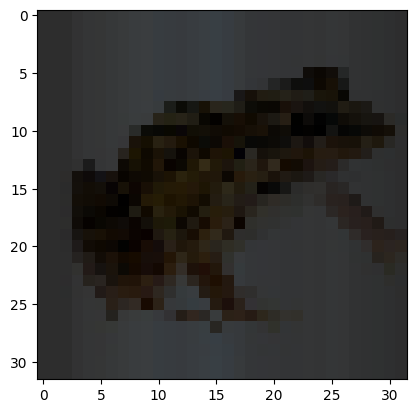

1/1 [==============================] - 0s 26ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


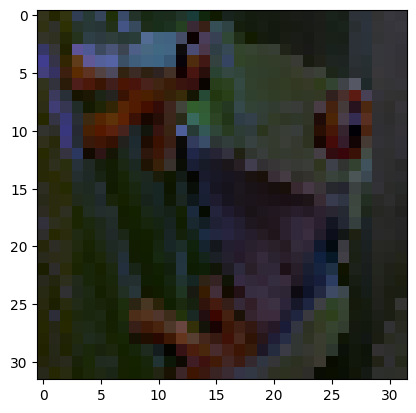

1/1 [==============================] - 0s 23ms/step
picture shows:     frog
model prediction:  cat
wrong
(32, 32, 3)


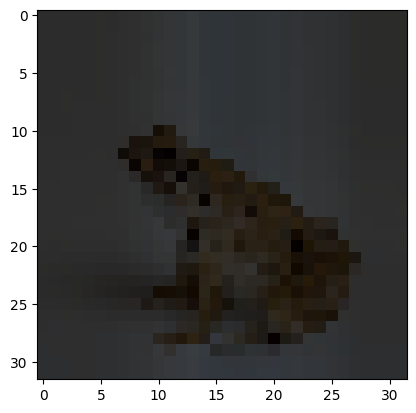

1/1 [==============================] - 0s 25ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


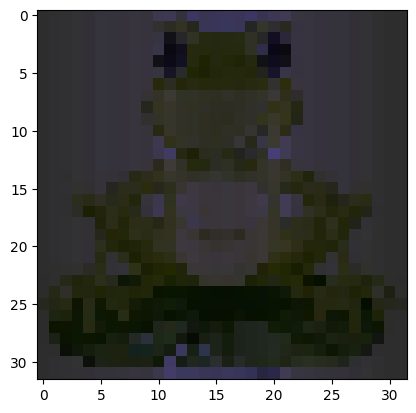

1/1 [==============================] - 0s 25ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


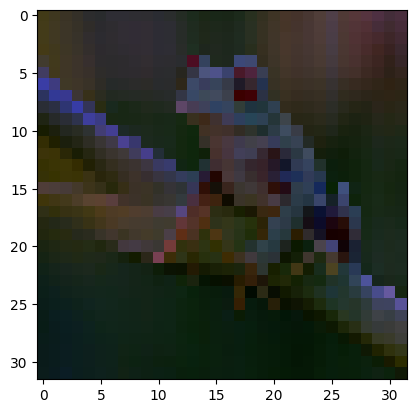

1/1 [==============================] - 0s 23ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


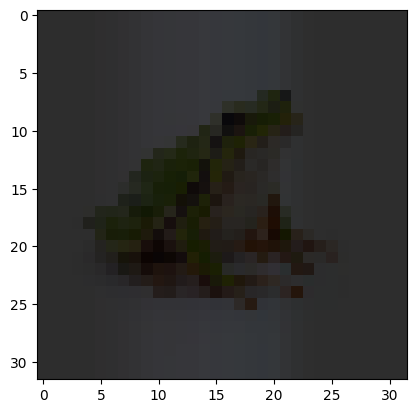

1/1 [==============================] - 0s 24ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


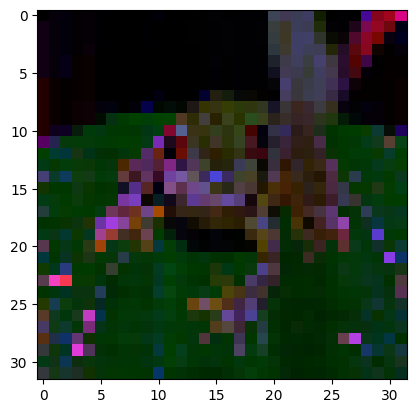

1/1 [==============================] - 0s 25ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


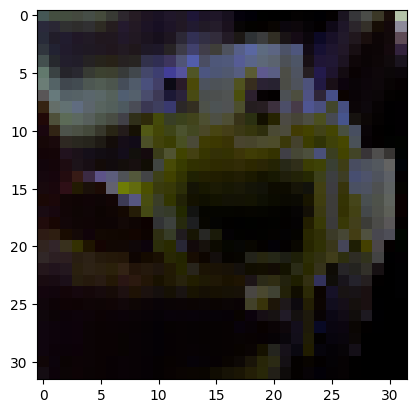

1/1 [==============================] - 0s 23ms/step
picture shows:     frog
model prediction:  bird
wrong
(32, 32, 3)


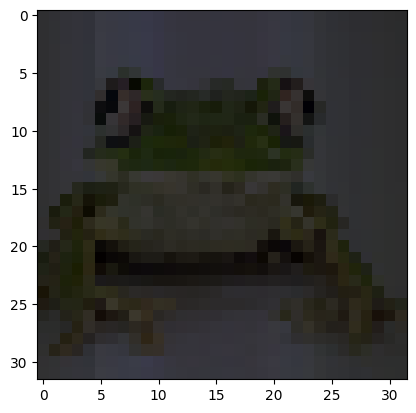

1/1 [==============================] - 0s 24ms/step
picture shows:     frog
model prediction:  frog
correct
(32, 32, 3)


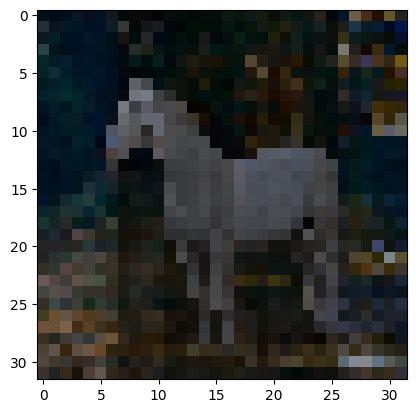

1/1 [==============================] - 0s 23ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


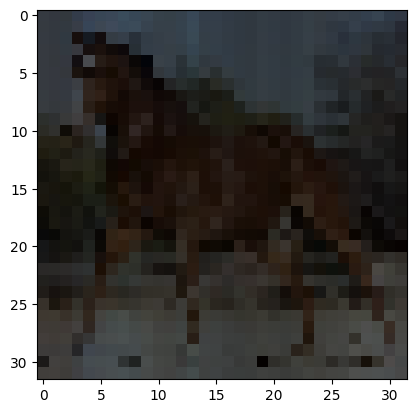

1/1 [==============================] - 0s 22ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


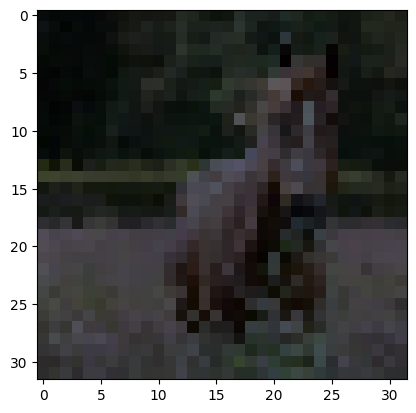

1/1 [==============================] - 0s 25ms/step
picture shows:     horse
model prediction:  deer
wrong
(32, 32, 3)


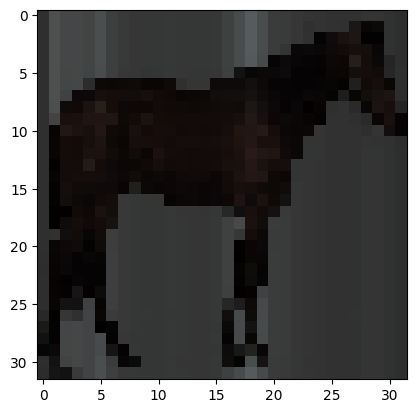

1/1 [==============================] - 0s 25ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


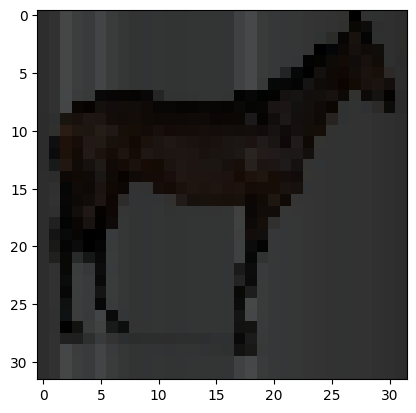

1/1 [==============================] - 0s 23ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


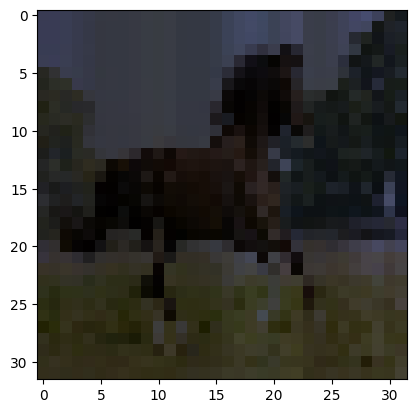

1/1 [==============================] - 0s 26ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


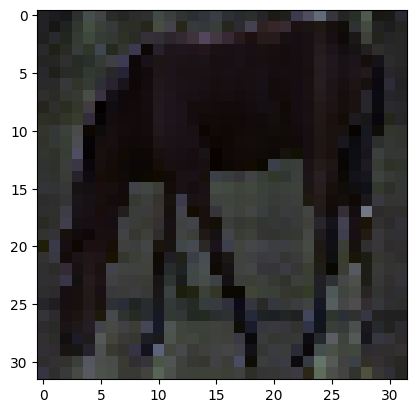

1/1 [==============================] - 0s 23ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


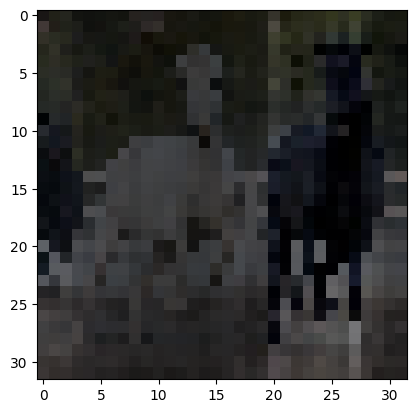

1/1 [==============================] - 0s 24ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


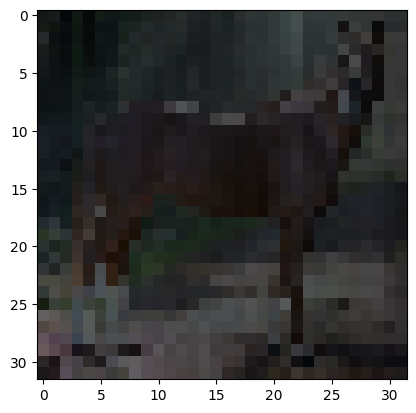

1/1 [==============================] - 0s 26ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


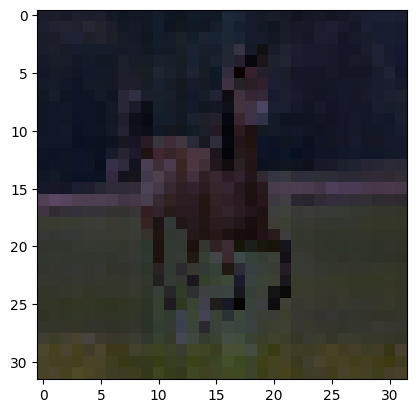

1/1 [==============================] - 0s 23ms/step
picture shows:     horse
model prediction:  horse
correct
(32, 32, 3)


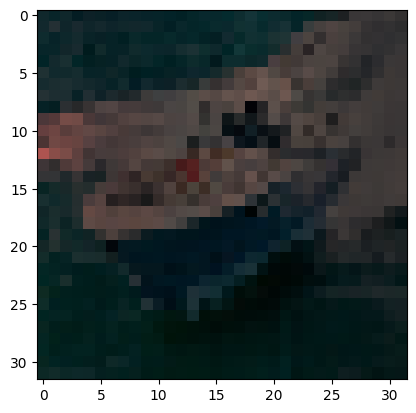

1/1 [==============================] - 0s 23ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


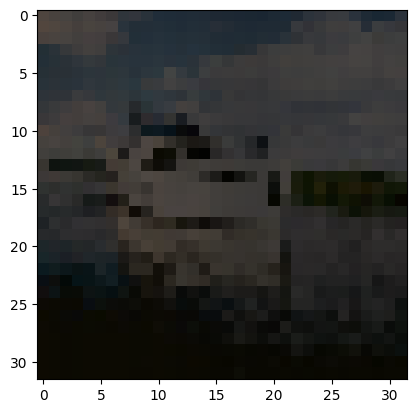

1/1 [==============================] - 0s 25ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


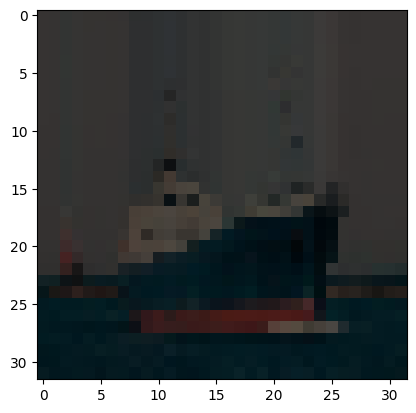

1/1 [==============================] - 0s 27ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


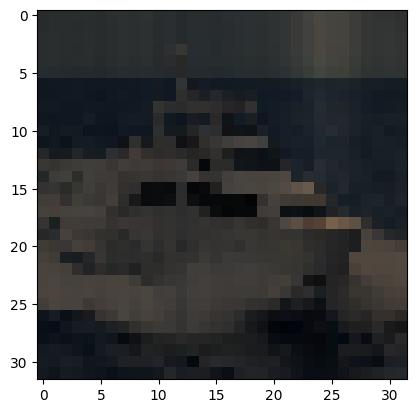

1/1 [==============================] - 0s 26ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


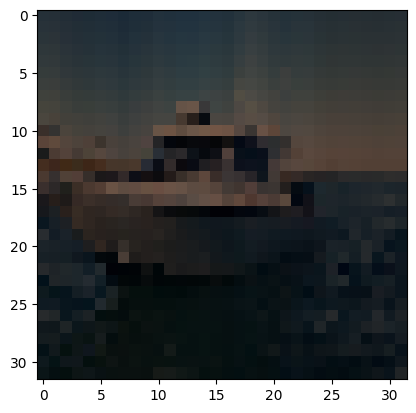

1/1 [==============================] - 0s 24ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


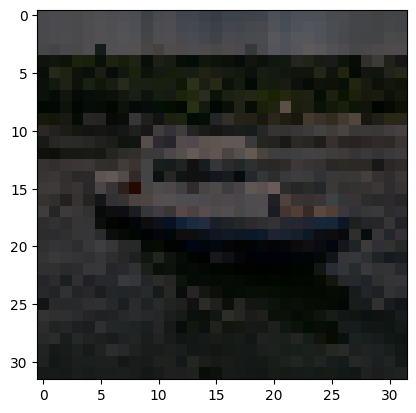

1/1 [==============================] - 0s 20ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


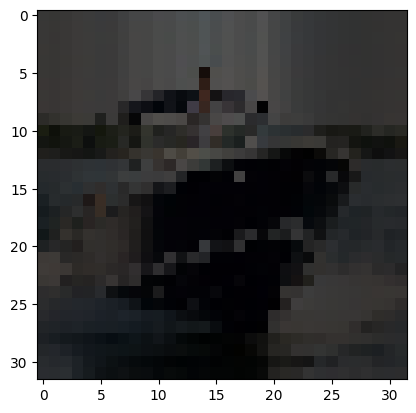

1/1 [==============================] - 0s 24ms/step
picture shows:     ship
model prediction:  airplane
wrong
(32, 32, 3)


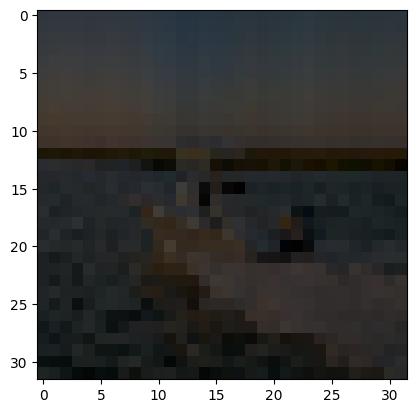

1/1 [==============================] - 0s 26ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


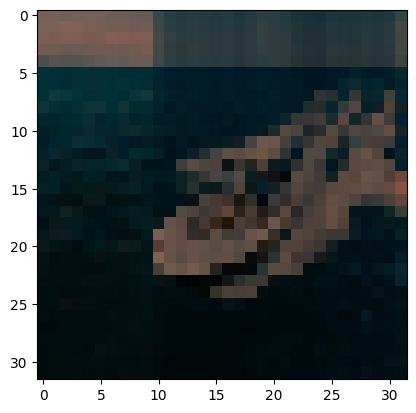

1/1 [==============================] - 0s 28ms/step
picture shows:     ship
model prediction:  ship
correct
(32, 32, 3)


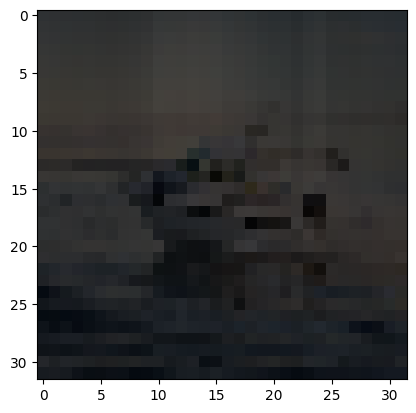

1/1 [==============================] - 0s 22ms/step
picture shows:     ship
model prediction:  airplane
wrong
(32, 32, 3)


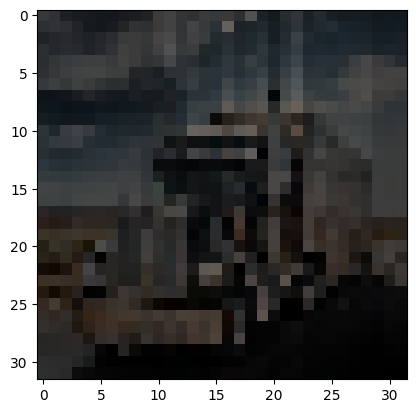

1/1 [==============================] - 0s 22ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


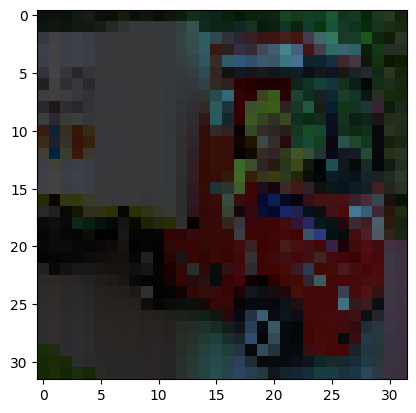

1/1 [==============================] - 0s 30ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


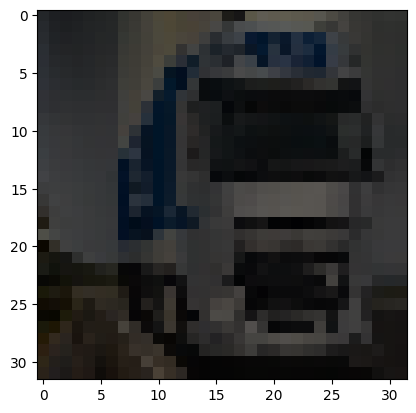

1/1 [==============================] - 0s 25ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


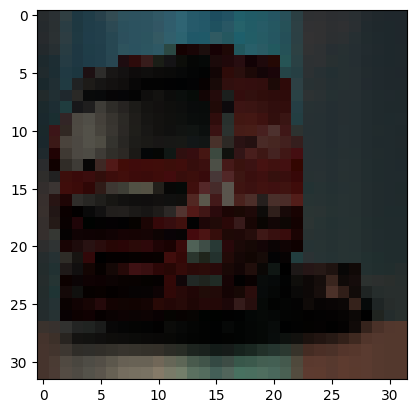

1/1 [==============================] - 0s 24ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


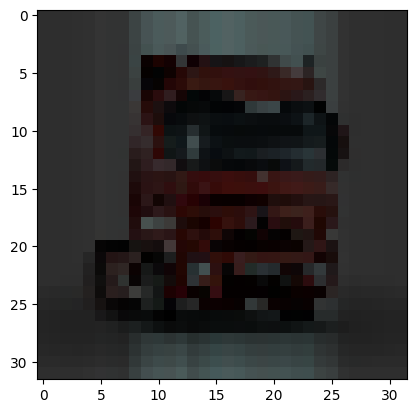

1/1 [==============================] - 0s 24ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


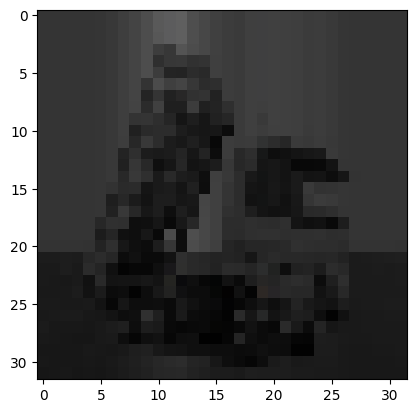

1/1 [==============================] - 0s 23ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


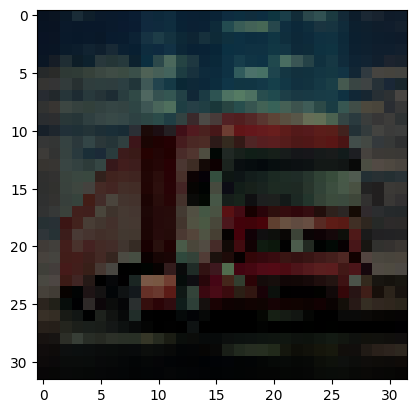

1/1 [==============================] - 0s 25ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


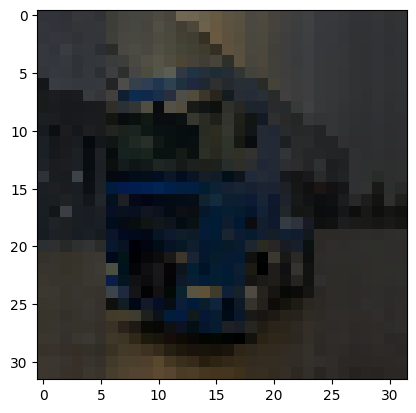

1/1 [==============================] - 0s 24ms/step
picture shows:     truck
model prediction:  truck
correct
(32, 32, 3)


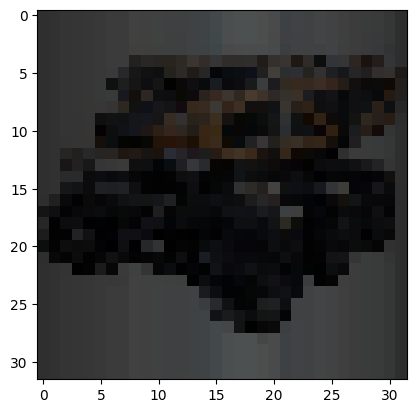

1/1 [==============================] - 0s 23ms/step
picture shows:     truck
model prediction:  automobile
wrong
(32, 32, 3)


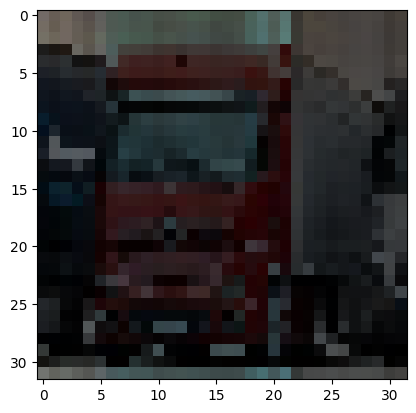

1/1 [==============================] - 0s 22ms/step
picture shows:     truck
model prediction:  truck
correct
total = 100
acc = 69.0 %


In [14]:
g=0
f=0

for x, y in zip(X, Y):
    print(x.shape)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.show()
    x = np.expand_dims(x, axis=0)
    predictions = new_model.predict([x])
    #print(predictions)
    print("picture shows:    ", catagories[y])
    print("model prediction: ", catagories[np.argmax(predictions)])
    if (y==np.argmax(predictions)):
        g = g+1
        print("correct")
    else:
        f = f+1
        print("wrong")
        
acc = g/(g+f)
tot = g + f
print("total =", tot)
print("acc =", acc*100,"%")


In this cell we iterate trough all the pictures and run them trough the model seperately. We also check if the guess was correct and calculated the accuracy of the model. 